In [0]:
dbutils.fs.ls("/FileStore/tables/clinicaltrial_2021_csv.gz")

Out[1]: [FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2021_csv.gz', name='clinicaltrial_2021_csv.gz', size=11921810, modificationTime=1647433652000)]

In [0]:
dbutils.fs.cp("/FileStore/tables/clinicaltrial_2021_csv.gz", "file:/tmp")

Out[2]: True

In [0]:
%sh
gunzip /tmp/clinicaltrial_2021_csv.gz
ls /tmp

Rserv
RtmpAJSxUn
chauffeur-daemon-params
chauffeur-daemon.pid
chauffeur-env.sh
clinicaltrial_2021_csv
custom-spark.conf
driver-daemon-params
driver-daemon.pid
driver-env.sh
hsperfdata_root
ipykernel-connection-ReplId-4dcc4-325cb-f6e26.json
ipykernel-connection-ReplId-5feaf-1f7c9-5114d-0.json
systemd-private-fe53b4ca92414eddbd51f872fe674a82-apache2.service-Tj9Npj
systemd-private-fe53b4ca92414eddbd51f872fe674a82-ntp.service-sWqKwg
systemd-private-fe53b4ca92414eddbd51f872fe674a82-systemd-logind.service-2ifxpf
systemd-private-fe53b4ca92414eddbd51f872fe674a82-systemd-resolved.service-vzPB1e
tmp.hVE5WUPxTv


In [0]:
%sh
mv  /tmp/clinicaltrial_2021_csv /tmp/clinicaltrial_2021.csv
ls  /tmp

Rserv
RtmpAJSxUn
chauffeur-daemon-params
chauffeur-daemon.pid
chauffeur-env.sh
clinicaltrial_2021.csv
custom-spark.conf
driver-daemon-params
driver-daemon.pid
driver-env.sh
hsperfdata_root
ipykernel-connection-ReplId-4dcc4-325cb-f6e26.json
ipykernel-connection-ReplId-5feaf-1f7c9-5114d-0.json
systemd-private-fe53b4ca92414eddbd51f872fe674a82-apache2.service-Tj9Npj
systemd-private-fe53b4ca92414eddbd51f872fe674a82-ntp.service-sWqKwg
systemd-private-fe53b4ca92414eddbd51f872fe674a82-systemd-logind.service-2ifxpf
systemd-private-fe53b4ca92414eddbd51f872fe674a82-systemd-resolved.service-vzPB1e
tmp.hVE5WUPxTv


In [0]:
dbutils.fs.mv("file:/tmp/clinicaltrial_2021.csv", "/FileStore/tables/", True)

Out[5]: True

CREATE MY RDD

In [0]:
my1stRDD= sc.textFile("DBFS:/FileStore/tables/clinicaltrial_2021.csv")

In [0]:
my1stRDD.take(5)

Out[7]: ['Id|Sponsor|Status|Start|Completion|Type|Submission|Conditions|Interventions',
 'NCT02758028|The University of Hong Kong|Recruiting|Aug 2005|Nov 2021|Interventional|Apr 2016||',
 'NCT02751957|Duke University|Completed|Jul 2016|Jul 2020|Interventional|Apr 2016|Autistic Disorder,Autism Spectrum Disorder|',
 'NCT02758483|Universidade Federal do Rio de Janeiro|Completed|Mar 2017|Jan 2018|Interventional|Apr 2016|Diabetes Mellitus|',
 'NCT02759848|Istanbul Medeniyet University|Completed|Jan 2012|Dec 2014|Observational|May 2016|Tuberculosis,Lung Diseases,Pulmonary Disease|']

In [0]:
headername = my1stRDD.first()
my2ndRDD = my1stRDD.filter(lambda line: line!= headername)
my2ndRDD.take(5)

Out[8]: ['NCT02758028|The University of Hong Kong|Recruiting|Aug 2005|Nov 2021|Interventional|Apr 2016||',
 'NCT02751957|Duke University|Completed|Jul 2016|Jul 2020|Interventional|Apr 2016|Autistic Disorder,Autism Spectrum Disorder|',
 'NCT02758483|Universidade Federal do Rio de Janeiro|Completed|Mar 2017|Jan 2018|Interventional|Apr 2016|Diabetes Mellitus|',
 'NCT02759848|Istanbul Medeniyet University|Completed|Jan 2012|Dec 2014|Observational|May 2016|Tuberculosis,Lung Diseases,Pulmonary Disease|',
 'NCT02758860|University of Roma La Sapienza|Active, not recruiting|Jun 2016|Sep 2020|Observational [Patient Registry]|Apr 2016|Diverticular Diseases,Diverticulum,Diverticulosis|']

SPLIT MY RDD

In [0]:
mysplitRDD = my2ndRDD.map(lambda c: (c.split ("|")))
mysplitRDD.take(5)

Out[9]: [['NCT02758028',
  'The University of Hong Kong',
  'Recruiting',
  'Aug 2005',
  'Nov 2021',
  'Interventional',
  'Apr 2016',
  '',
  ''],
 ['NCT02751957',
  'Duke University',
  'Completed',
  'Jul 2016',
  'Jul 2020',
  'Interventional',
  'Apr 2016',
  'Autistic Disorder,Autism Spectrum Disorder',
  ''],
 ['NCT02758483',
  'Universidade Federal do Rio de Janeiro',
  'Completed',
  'Mar 2017',
  'Jan 2018',
  'Interventional',
  'Apr 2016',
  'Diabetes Mellitus',
  ''],
 ['NCT02759848',
  'Istanbul Medeniyet University',
  'Completed',
  'Jan 2012',
  'Dec 2014',
  'Observational',
  'May 2016',
  'Tuberculosis,Lung Diseases,Pulmonary Disease',
  ''],
 ['NCT02758860',
  'University of Roma La Sapienza',
  'Active, not recruiting',
  'Jun 2016',
  'Sep 2020',
  'Observational [Patient Registry]',
  'Apr 2016',
  'Diverticular Diseases,Diverticulum,Diverticulosis',
  '']]

Question 1

In [0]:
my2ndRDD.count()

Out[10]: 387261

Question 2

In [0]:
typesRDD= mysplitRDD.map(lambda c: (c[5],int(1)))
typesRDD.take(10)

Out[11]: [('Interventional', 1),
 ('Interventional', 1),
 ('Interventional', 1),
 ('Observational', 1),
 ('Observational [Patient Registry]', 1),
 ('Interventional', 1),
 ('Observational [Patient Registry]', 1),
 ('Interventional', 1),
 ('Interventional', 1),
 ('Interventional', 1)]

In [0]:
types2RDD=typesRDD.reduceByKey(lambda c, d: c+d)
types2RDD.take(10)

Out[12]: [('Observational', 77540),
 ('Observational [Patient Registry]', 8180),
 ('Interventional', 301472),
 ('Expanded Access', 69)]

In [0]:
types3RDD= types2RDD.sortBy(lambda c: c[1], ascending=False)
types3RDD.take(5)

Out[13]: [('Interventional', 301472),
 ('Observational', 77540),
 ('Observational [Patient Registry]', 8180),
 ('Expanded Access', 69)]

In [0]:
def toCSVLine(output):
    return ' '.join(str(d) for d in output)
freshRDD=types3RDD.map(toCSVLine)

In [0]:
freshRDD.collect()

Out[15]: ['Interventional 301472',
 'Observational 77540',
 'Observational [Patient Registry] 8180',
 'Expanded Access 69']

In [0]:
for c in freshRDD.collect():
    print (c)

Interventional 301472
Observational 77540
Observational [Patient Registry] 8180
Expanded Access 69


QUESTION 3

In [0]:
myconditionsRDD= mysplitRDD.map(lambda c: (c[7]))
myconditionsRDD.take(10)

Out[17]: ['',
 'Autistic Disorder,Autism Spectrum Disorder',
 'Diabetes Mellitus',
 'Tuberculosis,Lung Diseases,Pulmonary Disease',
 'Diverticular Diseases,Diverticulum,Diverticulosis',
 'Asthma',
 'Hypoventilation',
 'Lymphoma',
 '',
 'Myositis']

In [0]:
mysplitconditionsRDD= myconditionsRDD.flatMap(lambda c: (c.split(",")))
mysplitconditionsRDD.take(10)

Out[18]: ['',
 'Autistic Disorder',
 'Autism Spectrum Disorder',
 'Diabetes Mellitus',
 'Tuberculosis',
 'Lung Diseases',
 'Pulmonary Disease',
 'Diverticular Diseases',
 'Diverticulum',
 'Diverticulosis']

In [0]:
Space= ['']
myfilteredRDD=mysplitconditionsRDD.filter(lambda c: c not in Space)
myfilteredRDD.take(5)

Out[19]: ['Autistic Disorder',
 'Autism Spectrum Disorder',
 'Diabetes Mellitus',
 'Tuberculosis',
 'Lung Diseases']

In [0]:
myfiltered2RDD= myfilteredRDD.map(lambda c:(c,1))
myfiltered2RDD.take(10)

Out[20]: [('Autistic Disorder', 1),
 ('Autism Spectrum Disorder', 1),
 ('Diabetes Mellitus', 1),
 ('Tuberculosis', 1),
 ('Lung Diseases', 1),
 ('Pulmonary Disease', 1),
 ('Diverticular Diseases', 1),
 ('Diverticulum', 1),
 ('Diverticulosis', 1),
 ('Asthma', 1)]

In [0]:
myfiltered3RDD= myfiltered2RDD.reduceByKey(lambda c, d: c+d)
myfiltered3RDD.take(10)

Out[21]: [('Autistic Disorder', 867),
 ('Autism Spectrum Disorder', 880),
 ('Tuberculosis', 1118),
 ('Diverticular Diseases', 65),
 ('Diverticulosis', 18),
 ('Asthma', 3089),
 ('Lymphoma', 5395),
 ('Myositis', 108),
 ('Stomach Ulcer', 90),
 ('Cholelithiasis', 180)]

In [0]:
lastfilteredRDD= myfiltered3RDD.sortBy(lambda c: c[1], ascending=False)
lastfilteredRDD.take(5)

Out[22]: [('Carcinoma', 13389),
 ('Diabetes Mellitus', 11080),
 ('Neoplasms', 9371),
 ('Breast Neoplasms', 8640),
 ('Syndrome', 8032)]

In [0]:
def toCSVLine(output):
    return ' '.join(str(f) for f in output)
lastfiltered2RDD=lastfilteredRDD.map(toCSVLine)

In [0]:
lastfiltered2RDD.take(5)

Out[24]: ['Carcinoma 13389',
 'Diabetes Mellitus 11080',
 'Neoplasms 9371',
 'Breast Neoplasms 8640',
 'Syndrome 8032']

In [0]:
for c in lastfiltered2RDD.take(5):
    print (c)

Carcinoma 13389
Diabetes Mellitus 11080
Neoplasms 9371
Breast Neoplasms 8640
Syndrome 8032


QUESTION 4

CREATE MESH RDD

In [0]:
mymeshRDD= sc.textFile("DBFS:/FileStore/tables/mesh.csv")
mymeshRDD.take(10)

Out[26]: ['term,tree',
 'Calcimycin,D03.633.100.221.173',
 'A-23187,D03.633.100.221.173',
 'Temefos,D02.705.400.625.800',
 'Temefos,D02.705.539.345.800',
 'Temefos,D02.886.300.692.800',
 'Abate,D02.705.400.625.800',
 'Abate,D02.705.539.345.800',
 'Abate,D02.886.300.692.800',
 'Difos,D02.705.400.625.800']

In [0]:
header = mymeshRDD.first()
noheaderRDD = mymeshRDD.filter(lambda line: line!= header)
noheaderRDD.take(10)

Out[27]: ['Calcimycin,D03.633.100.221.173',
 'A-23187,D03.633.100.221.173',
 'Temefos,D02.705.400.625.800',
 'Temefos,D02.705.539.345.800',
 'Temefos,D02.886.300.692.800',
 'Abate,D02.705.400.625.800',
 'Abate,D02.705.539.345.800',
 'Abate,D02.886.300.692.800',
 'Difos,D02.705.400.625.800',
 'Difos,D02.705.539.345.800']

In [0]:
splitedmeshRDD=noheaderRDD.map(lambda row: (row.split(",")))
splitedmeshRDD.take(10)

Out[28]: [['Calcimycin', 'D03.633.100.221.173'],
 ['A-23187', 'D03.633.100.221.173'],
 ['Temefos', 'D02.705.400.625.800'],
 ['Temefos', 'D02.705.539.345.800'],
 ['Temefos', 'D02.886.300.692.800'],
 ['Abate', 'D02.705.400.625.800'],
 ['Abate', 'D02.705.539.345.800'],
 ['Abate', 'D02.886.300.692.800'],
 ['Difos', 'D02.705.400.625.800'],
 ['Difos', 'D02.705.539.345.800']]

In [0]:
joinedmeshcli=lastfilteredRDD.join(splitedmeshRDD)
joinedmeshcli.take(5)

Out[29]: [('Syndrome', (8032, 'C23.550.288.500')),
 ('Lymphoma', (5395, 'C04.557.386')),
 ('Lymphoma', (5395, 'C15.604.515.569')),
 ('Lymphoma', (5395, 'C20.683.515.761')),
 ('Infections', (5323, 'C01'))]

In [0]:
mapjoined=joinedmeshcli.map(lambda c: (c[1]))\
.map(lambda c: (c[1],c[0]))\
.map(lambda c: (c[0].split('.')[0],c[1]))\
.reduceByKey(lambda c,d: c+d )\
.sortBy(lambda c: c[1], ascending=False)
mapjoined.take(10)

Out[30]: [('C04', 143994),
 ('C23', 136079),
 ('C01', 106674),
 ('C14', 94523),
 ('C10', 92310),
 ('C06', 85646),
 ('C08', 70720),
 ('C13', 42599),
 ('C18', 41276),
 ('C12', 40161)]

QUESTION 5

In [0]:
mypharmaRDD= sc.textFile("DBFS:/FileStore/tables/pharma.csv")
mypharmaRDD.take(10)

Out[31]: ['"Company","Parent_Company","Penalty_Amount","Subtraction_From_Penalty","Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting","Penalty_Year","Penalty_Date","Offense_Group","Primary_Offense","Secondary_Offense","Description","Level_of_Government","Action_Type","Agency","Civil/Criminal","Prosecution_Agreement","Court","Case_ID","Private_Litigation_Case_Title","Lawsuit_Resolution","Facility_State","City","Address","Zip","NAICS_Code","NAICS_Translation","HQ_Country_of_Parent","HQ_State_of_Parent","Ownership_Structure","Parent_Company_Stock_Ticker","Major_Industry_of_Parent","Specific_Industry_of_Parent","Info_Source","Notes"',
 '"Abbott Laboratories","Abbott Laboratories","$5,475,000","$0","$5,475,000","2013","20131227","government-contracting-related offenses","False Claims Act and related","kickbacks and bribery","Abbott Laboratories agreed to $5.475 million to resolve allegations that it violated the False Claims Act by paying kickbacks to induce doctors to implant the c

In [0]:
header = mypharmaRDD.first()
noheaderpharmaRDD = mypharmaRDD.filter(lambda line: line!= header)
noheaderpharmaRDD.take(10)

Out[32]: ['"Abbott Laboratories","Abbott Laboratories","$5,475,000","$0","$5,475,000","2013","20131227","government-contracting-related offenses","False Claims Act and related","kickbacks and bribery","Abbott Laboratories agreed to $5.475 million to resolve allegations that it violated the False Claims Act by paying kickbacks to induce doctors to implant the company\'s carotid, biliary and peripheral vascular products.","federal","agency action","Justice Department Civil Division","civil","","","","","","","","","","","","USA","Illinois","publicly traded","ABT","pharmaceuticals","pharmaceuticals","https://www.justice.gov/opa/pr/abbott-laboratories-pays-us-5475-million-settle-claims-company-paid-kickbacks-physicians",""',
 '"Abbott Laboratories Inc.","AbbVie","$1,500,000,000","$0","$1,500,000,000","2012","20120507","healthcare-related offenses","off-label or unapproved promotion of medical products","","Global Health Care Company Abbott Laboratories Inc. has pleaded guilty and agreed to

In [0]:
splitedpharmaRDD= noheaderpharmaRDD.map(lambda row:(row.split (",",)))
splitedpharmaRDD.take(5)

Out[33]: [['"Abbott Laboratories"',
  '"Abbott Laboratories"',
  '"$5',
  '475',
  '000"',
  '"$0"',
  '"$5',
  '475',
  '000"',
  '"2013"',
  '"20131227"',
  '"government-contracting-related offenses"',
  '"False Claims Act and related"',
  '"kickbacks and bribery"',
  '"Abbott Laboratories agreed to $5.475 million to resolve allegations that it violated the False Claims Act by paying kickbacks to induce doctors to implant the company\'s carotid',
  ' biliary and peripheral vascular products."',
  '"federal"',
  '"agency action"',
  '"Justice Department Civil Division"',
  '"civil"',
  '""',
  '""',
  '""',
  '""',
  '""',
  '""',
  '""',
  '""',
  '""',
  '""',
  '""',
  '"USA"',
  '"Illinois"',
  '"publicly traded"',
  '"ABT"',
  '"pharmaceuticals"',
  '"pharmaceuticals"',
  '"https://www.justice.gov/opa/pr/abbott-laboratories-pays-us-5475-million-settle-claims-company-paid-kickbacks-physicians"',
  '""'],
 ['"Abbott Laboratories Inc."',
  '"AbbVie"',
  '"$1',
  '500',
  '000',
  '0

In [0]:
newpharma= noheaderpharmaRDD.map(lambda line: line.replace('"','').split(",") [1])\
.map(lambda c:(c,1))\
.reduceByKey(lambda c,d: c+d)
newpharma.take(20)

Out[34]: [('Abbott Laboratories', 26),
 ('AbbVie', 38),
 (' LLC', 26),
 ('AstraZeneca', 22),
 ('Sanofi', 24),
 ('AVEO Pharmaceuticals', 1),
 ('Bausch Health', 11),
 ('GlaxoSmithKline', 31),
 ('Teva Pharmaceutical Industries', 36),
 ('Merck', 64),
 ('Novartis', 34),
 ('Daiichi Sankyo', 5),
 ('Eisai', 7),
 ('KV Pharmaceutical', 7),
 (" INC. EMPLOYEES' 401(K) SAVINGS PLAN", 1),
 ('Novo Holdings A/S', 8),
 (' INC.', 38),
 ('Sun Pharmaceuticals', 4),
 (' S.A.', 1),
 ('Takeda Pharmaceutical', 17)]

In [0]:
mapRDD= mysplitRDD.map(lambda c: (c[1]))\
.map(lambda c: (c,1))\
.reduceByKey(lambda c,d: c+d)

In [0]:
mapRDD.take(10)

Out[36]: [('The University of Hong Kong', 757),
 ('Universidade Federal do Rio de Janeiro', 103),
 ('University of Roma La Sapienza', 289),
 ('Ankara University', 107),
 ('Ruijin Hospital', 200),
 ('Washington University School of Medicine', 1374),
 ('Orphazyme', 7),
 ('Novo Nordisk A/S', 1081),
 ('Bulent Ecevit University', 31),
 ('Institut für Pharmakologie und Präventive Medizin', 24)]

In [0]:
joinedclin= mapRDD.subtractByKey(newpharma)\
.sortBy(lambda c: c[1], ascending=False)
joinedclin.take(10)

Out[37]: [('National Cancer Institute (NCI)', 3218),
 ('M.D. Anderson Cancer Center', 2414),
 ('Assistance Publique - Hôpitaux de Paris', 2369),
 ('Mayo Clinic', 2300),
 ('Merck Sharp & Dohme Corp.', 2243),
 ('Assiut University', 2154),
 ('Novartis Pharmaceuticals', 2088),
 ('Massachusetts General Hospital', 1971),
 ('Cairo University', 1928),
 ('Hoffmann-La Roche', 1828)]

In [0]:
def toCSVLine(field):
    return " ".join(str(c) for c in field)
A=joinedclin.map(toCSVLine)

In [0]:
A.take(20)

Out[39]: ['National Cancer Institute (NCI) 3218',
 'M.D. Anderson Cancer Center 2414',
 'Assistance Publique - Hôpitaux de Paris 2369',
 'Mayo Clinic 2300',
 'Merck Sharp & Dohme Corp. 2243',
 'Assiut University 2154',
 'Novartis Pharmaceuticals 2088',
 'Massachusetts General Hospital 1971',
 'Cairo University 1928',
 'Hoffmann-La Roche 1828',
 'National Taiwan University Hospital 1814',
 'Eli Lilly and Company 1641',
 'Memorial Sloan Kettering Cancer Center 1604',
 'University of California, San Francisco 1598',
 'National Institute of Allergy and Infectious Diseases (NIAID) 1582',
 'Duke University 1581',
 'Stanford University 1552',
 'Bayer 1469',
 'Seoul National University Hospital 1465',
 'Washington University School of Medicine 1374']

In [0]:
for b in A.take(10):
    print (b)

National Cancer Institute (NCI) 3218
M.D. Anderson Cancer Center 2414
Assistance Publique - Hôpitaux de Paris 2369
Mayo Clinic 2300
Merck Sharp & Dohme Corp. 2243
Assiut University 2154
Novartis Pharmaceuticals 2088
Massachusetts General Hospital 1971
Cairo University 1928
Hoffmann-La Roche 1828


QUESTION 6

In [0]:
mymonthRDD= mysplitRDD.map(lambda t: (t[2],t[4]))\
.filter(lambda t: "2021" in t[1])\
.filter(lambda t: "Completed" in t[0])\
.map(lambda t: (t[1],1))\
.reduceByKey(lambda t, u: t+u)\
.map(lambda t: (t[0].split(" ")[0],t[1]))\
.sortByKey(ascending=False)
mymonthRDD.take(10)

Out[41]: [('Sep', 528),
 ('Oct', 187),
 ('May', 984),
 ('Mar', 1227),
 ('Jun', 1094),
 ('Jul', 819),
 ('Jan', 1131),
 ('Feb', 934),
 ('Aug', 700),
 ('Apr', 967)]

In [0]:
def toCSVLine(field):
    return " ".join(str(d) for d in field)
monthRDD= mymonthRDD.map(toCSVLine)

In [0]:
monthRDD.take(10)

Out[43]: ['Sep 528',
 'Oct 187',
 'May 984',
 'Mar 1227',
 'Jun 1094',
 'Jul 819',
 'Jan 1131',
 'Feb 934',
 'Aug 700',
 'Apr 967']

In [0]:
for c in monthRDD.take(10):
    print (c)

Sep 528
Oct 187
May 984
Mar 1227
Jun 1094
Jul 819
Jan 1131
Feb 934
Aug 700
Apr 967


In [0]:
import calendar
d={i:e for e, i in enumerate (calendar.month_abbr[1:],1)}

#{'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}

month2RDD=mymonthRDD.sortBy(keyfunc=lambda x: d.get(x[0]))

In [0]:
def toCSVLine(data):
    return " ".join(str(d) for d in data)
month3RDD= month2RDD.map(toCSVLine)

month3RDD.collect()
for a in  month3RDD.collect():
    print (a)

Jan 1131
Feb 934
Mar 1227
Apr 967
May 984
Jun 1094
Jul 819
Aug 700
Sep 528
Oct 187


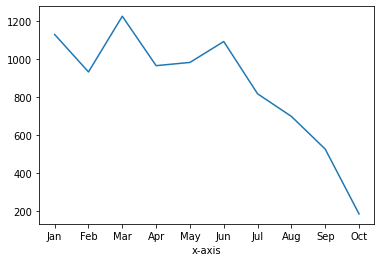

In [0]:
import matplotlib.pyplot as plt 
    # initializing the data 
x = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct"]
y = [1131,934,1227,967,984,1094,819,700,528,187]
#plotting the data 
plt.plot(x,y)
#Adding the title plt.title("Completed Studies by Month")
#Adding the labels plt.ylabel("y-axis")
plt.xlabel("x-axis")
plt.show()

FURTHER ANALYSIS ON QUES 3

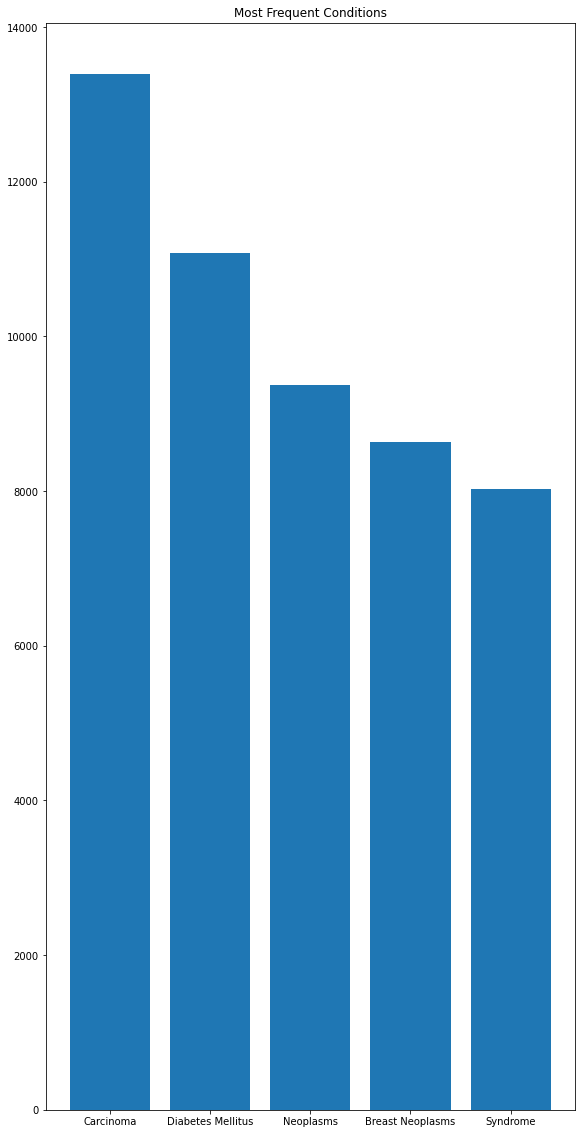

In [0]:
import matplotlib.pyplot as plt 
conditions = ['Carcinoma', 'Diabetes Mellitus', 'Neoplasms', 'Breast Neoplasms', 'Syndrome',]
figures = [13389, 11080, 9371, 8640, 8032]
plt.figure(figsize=(55, 20))
plt.subplot(151)
plt.bar(conditions, figures)
plt.title("Most Frequent Conditions")
plt.show()